Code in the function

In [124]:
import matplotlib
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt


base_length = list(np.meshgrid(np.linspace(0, 3, 50)))
angles = list(np.linspace(0, np.pi/2, 50))

Y, X = np.meshgrid(angles, base_length)
Area = lambda t,b:(b+ np.cos(t))*(0.5*(3-b))*(0.5*(3-b))*np.sin(t)
Z = Area(Y,X)


Contour plot

(0, 1.5707963267948966)

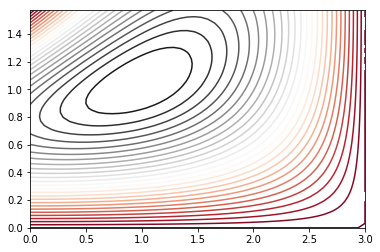

In [167]:
f = lambda x, y : 1.5*x*np.sin(y) - 1.5*x*np.sin(y)*np.cos(y) + 2.25*np.sin(y)*np.cos(y) - 0.5*x*x*np.sin(y) + 0.25*x*x*np.sin(y)*np.cos(y)

# plot
X, Y = np.meshgrid(np.linspace(0, 3, 50), np.linspace(0, np.pi/2, 50))
Z = f(X,Y)
plt.figure()
plt.contour(X, Y, f(X,Y), 25, cmap='RdGy')

plt.xlim(0, 3)
plt.ylim(0, np.pi/2)

Surface plot

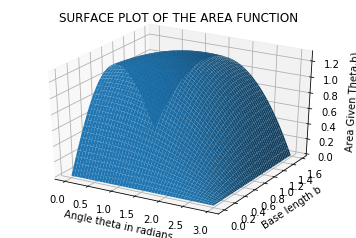

1.2456907840231282


In [170]:
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z)
ax.set_ylabel('Base length b')
ax.set_zlabel('Area Given Theta,b)')
ax.set_xlabel('Angle theta in radians')
ax.set_title('SURFACE PLOT OF THE AREA FUNCTION')

plt.show()
print(Area(1, 1.1))

Gradient descent with line search. This is a modificattion of the code we had in class for session 6.1.
I worked with Fabian on this.

minimum is [0.99929982 1.04698721] steps 11
[[-0.09117841 -0.75908674]
 [ 0.80412419 -0.82390308]
 [ 0.79236451 -0.9863495 ]
 [ 0.95394475 -0.99805324]
 [ 0.95143627 -1.03269144]
 [ 0.98885541 -1.03538859]
 [ 0.98825801 -1.04367581]
 [ 0.99727628 -1.04432039]
 [ 0.99713219 -1.04633634]
 [ 0.99933521 -1.0464946 ]
 [ 0.99929982 -1.04698721]]


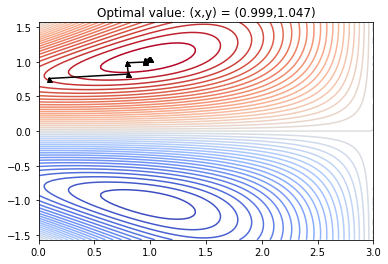

In [165]:
import numpy as np
import matplotlib.pyplot as plt

x, y = np.meshgrid(np.linspace(0, 3, 100), np.linspace(-np.pi / 2, np.pi / 2, 100))

#Define our functions, their graadient and the hessian
def f(inputvector):
    x, y = inputvector[0], inputvector[1]
    return 1.5 * x * np.sin(y) - 1.5 * x * np.sin(y) * np.cos(y) + 2.25 * np.sin(y) * np.cos(y) - 0.5 * x ** 2 * np.sin(
        y) + 0.25 * x * x * np.sin(y) * np.cos(y)


def fbar(inputvector):
    x, y = inputvector[0], inputvector[1]
    return np.array([1.5 * np.sin(y) - 1.5 * np.sin(y) * np.cos(y) - x * np.sin(y) + 0.5 * x * np.sin(y) * np.cos(y),
                     1.5 * x * np.cos(y) - 0.25 * x * x * (np.sin(y)) ** 2 + 0.25 * x * x * (
                         np.cos(y)) ** 2 - 1.5 * x * (np.cos(y)) ** 2 + 1.5 * x * (np.sin(y)) ** 2 - 0.5 * x * x * (
                         np.cos(y)) - 2.25 * (np.sin(y)) ** 2 + 2.25 * (np.cos(y)) ** 2])


def fbarbar(inputvector):
    x, y = inputvector[0], inputvector[1]
    return np.array([[0.5 * np.cos(y) * np.sin(y) - np.sin(y),
                      -x * np.cos(y) - 0.5 * np.cos(2 * y) - 1.5 * np.cos(2 * y) + 1.5 * np.cos(y)],
                     [0.5 * x + 1.5 + 1.5 * np.cos(y) - x * np.cos(y),
                      -1.5 * x * np.sin(y) - x * x * np.cos(y) * np.sin(y) + 0.5 * x * x * np.sin(y) - 9 * np.cos(
                          y) * np.sin(y)]])


def H_prime(x, a):
    result = np.matmul(np.transpose(fbar(x - (a * fbar(x)))), -fbar(x))
    return result


#Use bisection to determine the step size
def bisection(x):
    low, high, tol = 0, 1, 10 ** (-4)
    a = None

    while H_prime(x, high) < 0:
        high = high * 2

    while high - low > tol:
        a = np.mean([low, high])
        if H_prime(x, a) > 0:
            high = a
        if H_prime(x, a) < 0:
            low = a
    return a

def gradient_descent(x):
    history = []
    steps = 0
    rel_change = float("inf")
    f_val = f(x)
    tol = 10 ** (-6)

    while rel_change > tol and steps < 10 ** 4:
        step = fbar(x)
        step *= bisection(x)
        x = x - step

        new_f_val = f(x)
        rel_change = abs(new_f_val - f_val)
        f_val = new_f_val
        history.append(x)
        steps += 1
    return x, np.array(history)


initial = [0, 0.5]

minimum, history = gradient_descent(initial)
print("minimum is", abs(minimum), "steps", len(history))
print(history)

z = 1.5 * x * np.sin(y) - 1.5 * x * np.sin(y) * np.cos(y) + 2.25 * np.sin(y) * np.cos(y) - 0.5 * x * x * np.sin(
    y) + 0.25 * x * x * np.sin(y) * np.cos(y)

x, y = np.meshgrid(np.linspace(0, 3, 100), np.linspace(-np.pi / 2, np.pi / 2, 100))

plt.figure()

plt.contour(x, y, z, 50, cmap='coolwarm')

for i in range(len(history) - 1):
    plt.plot([abs(history[i][0]), abs(history[i + 1][0])],
             [abs(history[i][1]), abs(history[i + 1][1])], 'k-', marker='^', markersize=5)

plt.title('Optimal value: (x,y) = ({},{})'.format(round(history[-1][0], 3),
                                                  -round(history[-1][1], 3)))
plt.show()